In [1]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain


In [2]:
from genrecog.preprocess.preprocessor import Preprocessor

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
# dataset_preprcessor = Preprocessor('dataset/npz_files/dataset.npz')

ModuleNotFoundError: ignored

In [ ]:
# import torch
# from torch.utils.data import TensorDataset, DataLoader
# X,y = dataset_preprcessor.as_shuffled_torch()
# X, y = X.cuda(), y.cuda()
# X.shape


In [ ]:
# td = TensorDataset(X, y)
# train_dataset, test_dataset = torch.utils.data.random_split(td, (3600, 400))
# X_test, y_test = next(iter(DataLoader(test_dataset, shuffle=True, batch_size=400)))

In [ ]:
X,y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

X, y = X.cuda(), y.cuda()
X_test, y_test = X_test.cuda(), y_test.cuda()

RuntimeError: ignored

In [ ]:
from genrecog.preprocess.feature import Feature

feature_maker = Feature()
X_sample = feature_maker.torch_fbank_features(X[:100])

In [ ]:
X_sample = X_sample.transpose(1,-1)
# X_sample_1 = X_sample[:,:,:100]
print(X_sample.shape)

torch.Size([100, 40, 702])


In [ ]:
import torch

torch.manual_seed(0)

filter_num = 128
filter_size = 32

model = torch.nn.Sequential(
    torch.nn.Conv1d(in_channels=40, 
                    out_channels=filter_num, 
                    kernel_size=filter_size, 
                    padding=filter_size//2
                    ),
    torch.nn.BatchNorm1d(filter_num),
    torch.nn.LeakyReLU(),
    # torch.nn.Dropout(),
    torch.nn.MaxPool1d(kernel_size=4),
    torch.nn.Conv1d(in_channels=128, 
                    out_channels=256, 
                    kernel_size=filter_size, 
                    padding=filter_size//2
                    ),
    torch.nn.BatchNorm1d(256),
    torch.nn.LeakyReLU(),
    # torch.nn.Dropout(),
    torch.nn.MaxPool1d(kernel_size=4),
    torch.nn.Conv1d(in_channels=256, 
                    out_channels=512, 
                    kernel_size=filter_size, 
                    padding=filter_size//2
                    ),
    torch.nn.BatchNorm1d(512),
    torch.nn.LeakyReLU(),
    # torch.nn.Dropout(),
    torch.nn.MaxPool1d(kernel_size=4),
    torch.nn.Conv1d(in_channels=512, 
                    out_channels=1024, 
                    kernel_size=filter_size, 
                    padding=filter_size//2
                    ),
    torch.nn.BatchNorm1d(1024),
    torch.nn.LeakyReLU(),
    # torch.nn.Dropout(),
    torch.nn.MaxPool1d(kernel_size=4),
    torch.nn.Conv1d(in_channels=1024, 
                    out_channels=2048, 
                    kernel_size=filter_size, 
                    padding=filter_size//2
                    ),
    torch.nn.BatchNorm1d(2048),
    torch.nn.LeakyReLU(),
    # torch.nn.Dropout(),
    torch.nn.MaxPool1d(kernel_size=4),
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=2048  , out_features=256),
    torch.nn.Linear(in_features=256 , out_features=128),
    torch.nn.Linear(in_features=128 , out_features=10)
)

model.cuda()
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)


In [ ]:
# import torch
# import torch.nn as nn

# model = ""
# loss = ""
# optimizer = ""
# class Conv1d(nn.Module):
#   def __init__(
#       self,
#       in_channels,
#       out_channels,
#       kernel_size=32,
#       filter_num=128,
#       blocks_num=3,

#   ):
#     super().__init__()
#     self.in_channels = in_channels
#     self.out_channels = out_channels
#     self.kernel_size = kernel_size
#     self.filter_num = filter_num
#     self.blocks_num = blocks_num
#     self.first_layer = self.conv1d_block(
#         self.in_channels, 
#         self.filter_num*2,
#         self.kernel_size,
#         self.kernel_size//2
#         )
#     self.conv1d_layers = [self.conv1d_block(
#         self.filter_num*(2**(i+1)),
#         self.filter_num*(2**(i+2)),
#         self.kernel_size,
#         self.kernel_size//2
#         ) for i in range(blocks_num)]
    
#     self.linear_layer = nn.Linear(filter_num*(2**blocks_num), 10)
#     self.linear_layers = [
#         nn.Linear(filter_num*(2**blocks_num), 10)
#         for i in range(1)
#     ]
#     print(len(self.conv1d_layers))

#   def conv1d_block(self, in_channels, out_channels, kernel_size, padding):
#     return nn.Sequential(
#       torch.nn.Conv1d(in_channels=in_channels, 
#                   out_channels=out_channels, 
#                   kernel_size=kernel_size, 
#                   padding=padding
#                   ),
#       torch.nn.BatchNorm1d(out_channels),
#       torch.nn.LeakyReLU(),
#       torch.nn.MaxPool1d(kernel_size=4),
#     )


  
#   def forward(self, x):
#     print(x.type)
#     x = self.first_layer(x)
#     for i in range(len(self.conv1d_layers)):
#       print('pass ', i)
#       # print(self.conv1d_layers[i])
#       x = self.conv1d_layers[i](x)
#     # x = nn.Flatten(x)
#     x = x.view(x.size(0), -1)
#     x = self.linear_layer(x)
#     return x


# model = Conv1d(40,10)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
# loss = torch.nn.CrossEntropyLoss()

# # if torch.cuda.is_available():
# #   model = model.cuda()
# #   loss = loss.cuda()

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  
# y_pred = model(X_sample)

3
<built-in method type of Tensor object at 0x7f94adca7c50>
pass  0
pass  1
pass  2


RuntimeError: ignored

In [ ]:
import torch
import torch.nn as nn

model = ""
loss = ""
optimizer = ""
class ResNet(nn.Module):
  def __init__(
      self,
      in_channels
      ):
      super().__init__()
      self.filter_num = 128
      self.filter_size = 32
      self.in_channels = in_channels
      self.input_layer = self.conv1d_block(40, 128, 32, 16)
      self.hidden_layer_1 = self.conv1d_block(128, 256, 32, 16)
      self.hidden_layer_2 = self.conv1d_block(256, 512, 32, 16)
      self.hidden_layer_3 = self.conv1d_block(512, 1024, 32, 16)
      self.hidden_layer_4 = self.conv1d_block(1024, 2048, 32, 16)
      self.out_linear_1 = torch.nn.Linear(in_features=2048  , out_features=256)
      self.out_linear_2 = torch.nn.Linear(in_features=256 , out_features=128)
      self.out_linear_3 =torch.nn.Linear(in_features=128 , out_features=10)
      

  def forward(self, x):
    res = x
    x = self.input_layer(x)
    x = self.hidden_layer_1(x)
    x = self.hidden_layer_2(x)
    x = self.hidden_layer_3(x)
    x = self.hidden_layer_4(x)
    print(x.shape)
    print(res.shape)
    x = x.view(x.size(0), -1)
    x = self.out_linear_1(x)
    x = self.out_linear_2(x)
    x = self.out_linear_3(x)
    
  
  def conv1d_block(self, in_channels, out_channels, kernel_size, padding):
    return nn.Sequential(
      torch.nn.Conv1d(in_channels=in_channels, 
                  out_channels=out_channels, 
                  kernel_size=kernel_size, 
                  padding=padding
                  ),
      torch.nn.BatchNorm1d(out_channels),
      torch.nn.LeakyReLU(),
      torch.nn.MaxPool1d(kernel_size=4),
    )

model = ResNet(40)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
loss = torch.nn.CrossEntropyLoss()

if torch.cuda.is_available():
  model = model.cuda()
  loss = loss.cuda()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  
y_pred = model(X_sample)
model

torch.Size([100, 2048, 1])
torch.Size([100, 40, 702])


ResNet(
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_1): Sequential(
    (0): Conv1d(128, 256, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_2): Sequential(
    (0): Conv1d(256, 512, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_3): Sequent

In [ ]:
y_pred = model(X_sample)  # Check model architecture by trying to feed inputs through it.
assert y_pred.shape == (100, 10), "Expected a batch of 100 samples to produce output of shape (100, 10)"

torch.Size([100, 2048, 1])
torch.Size([100, 40, 702])


AttributeError: ignored

In [ ]:
from genrecog.nnet.CNN import Conv1d


model = ""
optimizer = ""
loss = ""

model = Conv1d(40)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
loss = torch.nn.CrossEntropyLoss()

if torch.cuda.is_available():
  model = model.cuda()
  loss = loss.cuda()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  
y_pred = model(X_sample)
model

Conv1d(
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_1): Sequential(
    (0): Conv1d(128, 256, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_2): Sequential(
    (0): Conv1d(256, 512, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_3): Sequent

In [ ]:
from genrecog.nnet.fbank_trainer import FbankTrainer


td = TensorDataset(X,y)
dl = DataLoader(td, shuffle=True, batch_size=400)
train_model = FbankTrainer(model, optimizer, loss, dl, 10, X_test, y_test)
train_model.train()


ModuleNotFoundError: ignored

In [ ]:
train_model.train()

import matplotlib.pyplot as plt
print(train_model.train_losses)
plt.plot(train_model.train_losses)
plt.plot(train_model.validation_losses)

In [ ]:
def train(model, dataloader,num_epochs=10):
  for i in range(0, num_epochs):
    model.train()
    for X_trn, y_trn in dataloader:
      model.zero_grad()
      X_trn = feature_maker.torch_fbank_features(X_trn).transpose(1,2)
      y_hat = model(X_trn)
      l = loss(y_hat, y_trn)
      l.backward()
      optimizer.step()
      print("Epoch %2d final minibatch had loss %.4f" % (i, l.item()))
    print(i)
    test(model, X_test, y_test)


In [ ]:
def test(model, X_test, y_test):
  model.eval()
  with torch.no_grad():
    X_tst = feature_maker.torch_fbank_features(X_test).transpose(1,2)
    y_pred = torch.softmax(model(X_tst), dim=1)
    l = loss(y_pred, y_test)
    print(l.item())
    # print(torch.argmax(pred, dim=1))
    # print(y_test)
  return y_pred
        # correct = 0
        # total = 0
        # for images, labels in dataloader:
        #     test_output, last_layer = model(images)
        #     pred_y = torch.max(test_output, 1)[1].data.squeeze()
        #     accuracy = (pred_y == labels).sum().item() / float(labels.size(0))


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

num_epoch = 10
td = TensorDataset(X,y)
dl = DataLoader(td, shuffle=True, batch_size=400)
model.cuda()
train(model, dl, 100)

  # model.eval()
  # y_hat_test = model(feature_maker.torch_fbank_features(X_test).transpose(1,2))
  # l_t = loss(y_hat_test, y_test)
  # print("Epoch %2d test loss %.4f" % (i, l_t.item()))

Epoch  0 final minibatch had loss 2.3341
Epoch  0 final minibatch had loss 2.1095
Epoch  0 final minibatch had loss 1.9620
Epoch  0 final minibatch had loss 1.8323
Epoch  0 final minibatch had loss 1.7639
Epoch  0 final minibatch had loss 1.7635
Epoch  0 final minibatch had loss 1.6417
Epoch  0 final minibatch had loss 1.5544
Epoch  0 final minibatch had loss 1.5699
0
2.300619602203369
Epoch  1 final minibatch had loss 1.4922
Epoch  1 final minibatch had loss 1.4391
Epoch  1 final minibatch had loss 1.4111
Epoch  1 final minibatch had loss 1.4069
Epoch  1 final minibatch had loss 1.3585
Epoch  1 final minibatch had loss 1.2981
Epoch  1 final minibatch had loss 1.2812
Epoch  1 final minibatch had loss 1.2558
Epoch  1 final minibatch had loss 1.2854
1
2.2834115028381348
Epoch  2 final minibatch had loss 1.2111
Epoch  2 final minibatch had loss 1.2042
Epoch  2 final minibatch had loss 1.2052
Epoch  2 final minibatch had loss 1.1151
Epoch  2 final minibatch had loss 1.1450
Epoch  2 final m

KeyboardInterrupt: ignored

In [ ]:
# X_tst = feature_maker.torch_fbank_features(X_test).transpose(1,2)
# print(X_trn.shape)
# X_tst.shape
print(X_test.shape)
pred = test(model, X_test, y_test)
# model.train()
# pred = model(feature_maker.torch_fbank_features(X_test).transpose(1,2))
pred

torch.Size([400, 154350])
1.831716775894165


tensor([[2.8321e-01, 6.9630e-03, 1.5596e-04,  ..., 6.7637e-01, 7.6045e-03,
         2.1763e-02],
        [3.9482e-02, 2.5597e-03, 1.7290e-03,  ..., 9.5901e-03, 3.7199e-03,
         2.1105e-01],
        [3.2698e-02, 2.1215e-02, 3.0544e-04,  ..., 2.2969e-01, 3.7520e-01,
         3.2564e-01],
        ...,
        [3.6267e-01, 1.0786e-02, 1.6650e-01,  ..., 2.0476e-02, 3.5022e-03,
         2.3358e-01],
        [8.2281e-05, 2.6786e-04, 5.3236e-05,  ..., 2.5899e-05, 4.1659e-06,
         5.3328e-05],
        [1.5901e-03, 5.9680e-02, 2.9614e-02,  ..., 2.1748e-03, 1.1883e-03,
         3.6308e-02]], device='cuda:0')

In [ ]:
# model.eval()
# pred = torch.softmax(model(X_tst), dim=1)
# print(torch.argmax(pred, dim=1))
# print(y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = torch.argmax(pred, dim=1)
accuracy_score(y_test.cpu(), y_pred.cpu())
# y_test.cpu(), y_pred.cpu()


0.6675

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = torch.argmax(pred, dim=1)
confusion_matrix(y_test.cpu(), y_pred.cpu(), normalize='true')
# confusion_matrix(np.array([1,1,1,1,2]), np.array([1,1,1,1,2]))


array([[0.725, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.05 , 0.   ,
        0.225],
       [0.125, 0.45 , 0.05 , 0.175, 0.   , 0.025, 0.125, 0.   , 0.   ,
        0.05 ],
       [0.   , 0.025, 0.675, 0.   , 0.   , 0.   , 0.075, 0.05 , 0.   ,
        0.175],
       [0.   , 0.   , 0.   , 0.925, 0.   , 0.075, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.1  , 0.   , 0.   , 0.675, 0.1  , 0.025, 0.   ,
        0.1  ],
       [0.025, 0.2  , 0.125, 0.   , 0.   , 0.025, 0.55 , 0.075, 0.   ,
        0.   ],
       [0.1  , 0.025, 0.075, 0.   , 0.   , 0.025, 0.05 , 0.625, 0.075,
        0.025],
       [0.1  , 0.   , 0.   , 0.05 , 0.05 , 0.   , 0.   , 0.125, 0.65 ,
        0.025],
       [0.2  , 0.   , 0.175, 0.   , 0.1  , 0.   , 0.   , 0.075, 0.05 ,
        0.4  ]])

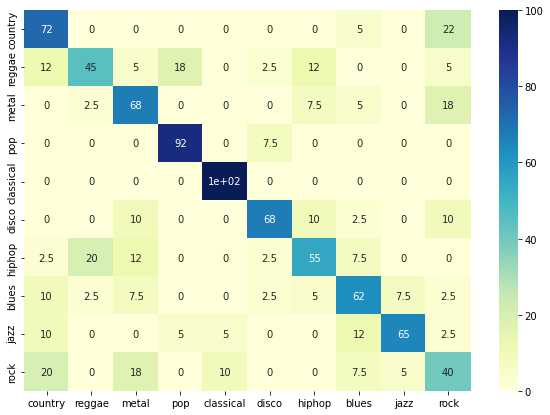

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test.cpu(), y_pred.cpu(), normalize='true')*100
genres = ['country', 'reggae', 'metal', 'pop', 'classical', 'disco', 'hiphop', 'blues', 'jazz', 'rock']
df_cm = pd.DataFrame(array, index = genres, columns = genres)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")


In [ ]:
loss(pred, y_test)

In [ ]:
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = torch.F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
import torch

torch.manual_seed(0)

filter_num = 100
filter_size = 10

model = torch.nn.Sequential(
    # torch.nn.LSTM(702, 40, 100, batch_first=True),
    torch.nn.Conv1d(in_channels=40, 
                    out_channels=filter_num, 
                    kernel_size=filter_size, 
                    padding=filter_size//2
                    ),
    # torch.nn.BatchNorm1d(filter_num),
    torch.nn.ReLU(),
    # torch.nn.Dropout(),
    # torch.nn.MaxPool1d(kernel_size=filter_size),
    torch.nn.Conv1d(in_channels=100, 
                    out_channels=filter_num, 
                    kernel_size=filter_size, 
                    padding=filter_size//2
                    ),
    # torch.nn.BatchNorm1d(filter_num),
    torch.nn.ReLU(),
    # torch.nn.Dropout(),
    # torch.nn.MaxPool1d(kernel_size=filter_size),
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=70400 , out_features=10)
)

# model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters())
model.cuda()

In [ ]:
print(X_sample.shape)
y_pred = model_2(X_sample)  # Check model architecture by trying to feed inputs through it.
assert y_pred.shape == (100, 10), "Expected a batch of 100 samples to produce output of shape (100, 10)"

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

num_epoch = 10
td = TensorDataset(X,y)
dl = DataLoader(td, shuffle=True, batch_size=400)

for i in range(0, num_epoch):
  for X_trn, y_trn in dl:
    # print(X.shape)
    model_2.zero_grad()
    X_trn = feature_maker.torch_fbank_features(X_trn).transpose(1,2)
    y_hat = model_2(X_trn)
    l = loss(y_hat, y_trn)
    l.backward()
    optimizer.step()
    print("Epoch %2d final minibatch had loss %.4f" % (i, l.item()))
  # y_hat_test = model_2(feature_maker.torch_fbank_features(X_test).transpose(1,2))
  # l_t = loss(y_hat_test, y_test)
  # print("Epoch %2d test loss %.4f" % (i, l_t.item()))

In [ ]:
for parameter in model.parameters():
    print(parameter.shape)